In [ ]:
Flask Flashing

In the web applications, there are scenarios where the developer might need to flash 
the messages to provide feedback to the users for the behavior of the application in different cases.

Flask provides the flash() method, in the same way, the client-side scripting language like JavaScript uses the alerts or 
the python GUI framework Tkinter uses the dialogue box or the message box.

The flash() method is used to generate the informative messages in the flask. it creates a message in one view and renders it to template 
view function called next.

In other words, the flash() method of the flask module passes the message to the next request which is an HTML template. 
The syntax to use the flash() method is given below.

flash(message, category)   
It accepts the following parameters.

message: it is the message to be flashed to the user.
Category: It is an optional parameter. Which may represent any error, information, or warning.

The messages are generated in the flask script using the flash() method of flask module. 
These messages need to be extracted in the template from the session. For this purpose, 
the method get_flashed_messages() is called in the HTML template.

The syntax to use this method is given below.

get_flashed_messages(with_categories, category_filter)  
It accepts the following parameters.

with_categories: This parameter is optional and used if the messages have the category.
category_filter: This parameter is also optional. It is useful to display only the specified messages.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>index</title>
</head>
<body>
    {% with messages= get_flashed_messages() %}
    {% if messages %}
        {% for message in messages %}
        <p>{{message}}</p>
        {% endfor %}
        {% endif %}
        {% endwith %}
        <h3>Welcome to my flask website</h3>
        <a href="{{url_for('login')}}">login</a>
</body>
</html>

save in index.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>login</title>
</head>
<body>
    {% if error%}
    <p><strong>{{error}}</strong></p>
    {% endif%}

    <form method="post" action="/login">
        <table>
            <tr><td>Email</td><td><input type="email" name="email"/></td></tr>
            <tr><td>Password</td><td><input type="password" name="password"/></td></tr>
            <tr><td><input type="submit" value="submit"/></td></tr>
        </table>
    </form>
</body>
</html>

save in login.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>profile</title>
</head>
<body>
    <h1>Welcome to my Flask Website!!!</h1>
    <h3>hello Sai Balaji</h3>
    <a href="{{url_for('login')}}">login</a>
</body>
</html>

save in profile.html

In [1]:
from flask import *
app=Flask(__name__)
app.secret_key='abc'
@app.route('/')
def index():
    return render_template('index.html')
@app.route('/profile')
def profile():
    return render_template('profile.html')
@app.route('/login',methods=['GET','POST'])
def login():
    error=None
    if request.method=='POST':
        if request.form['password']!='balaji':
            error='Invalid Password, Please Try Again'
        else:
            flash("You are successfully logged in the flask application")
            return redirect(url_for('profile'))
    return render_template('login.html',error=error)
if __name__=='__main__':
    app.run(port=5002,debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


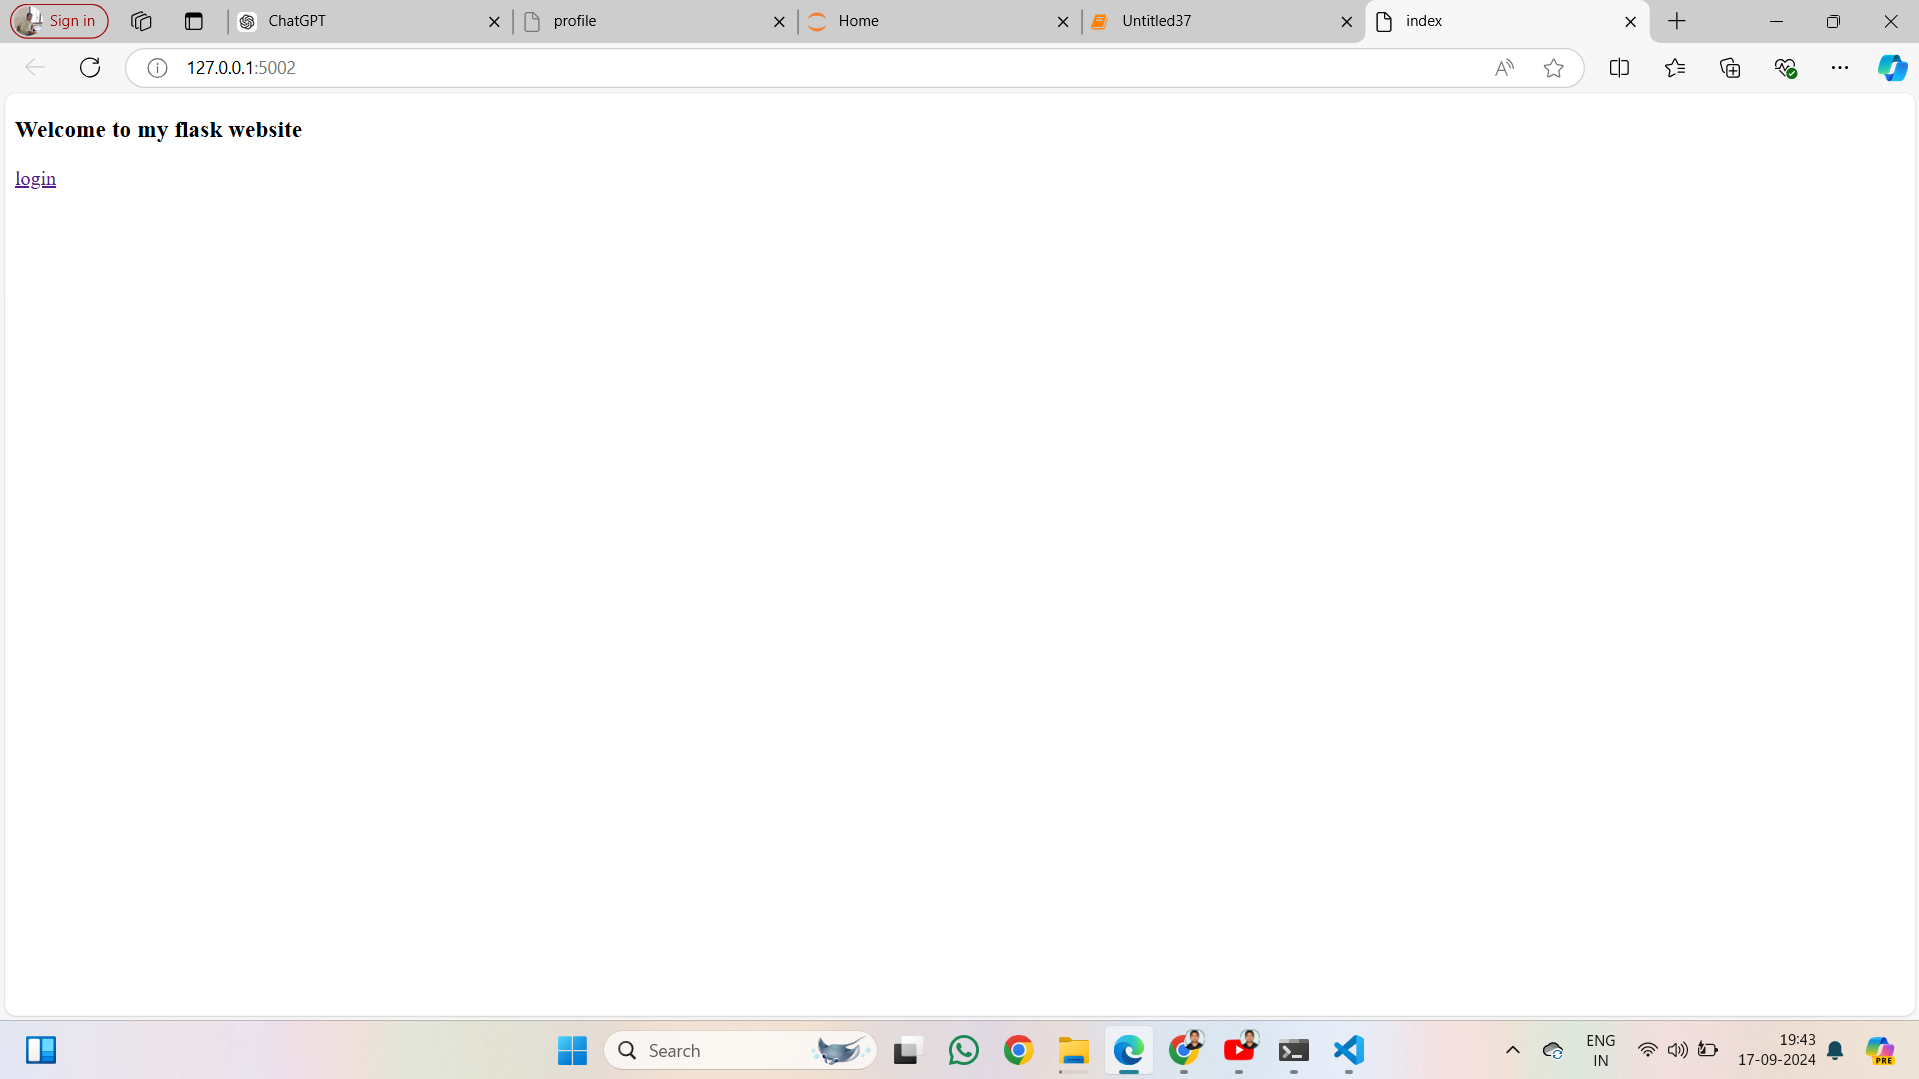

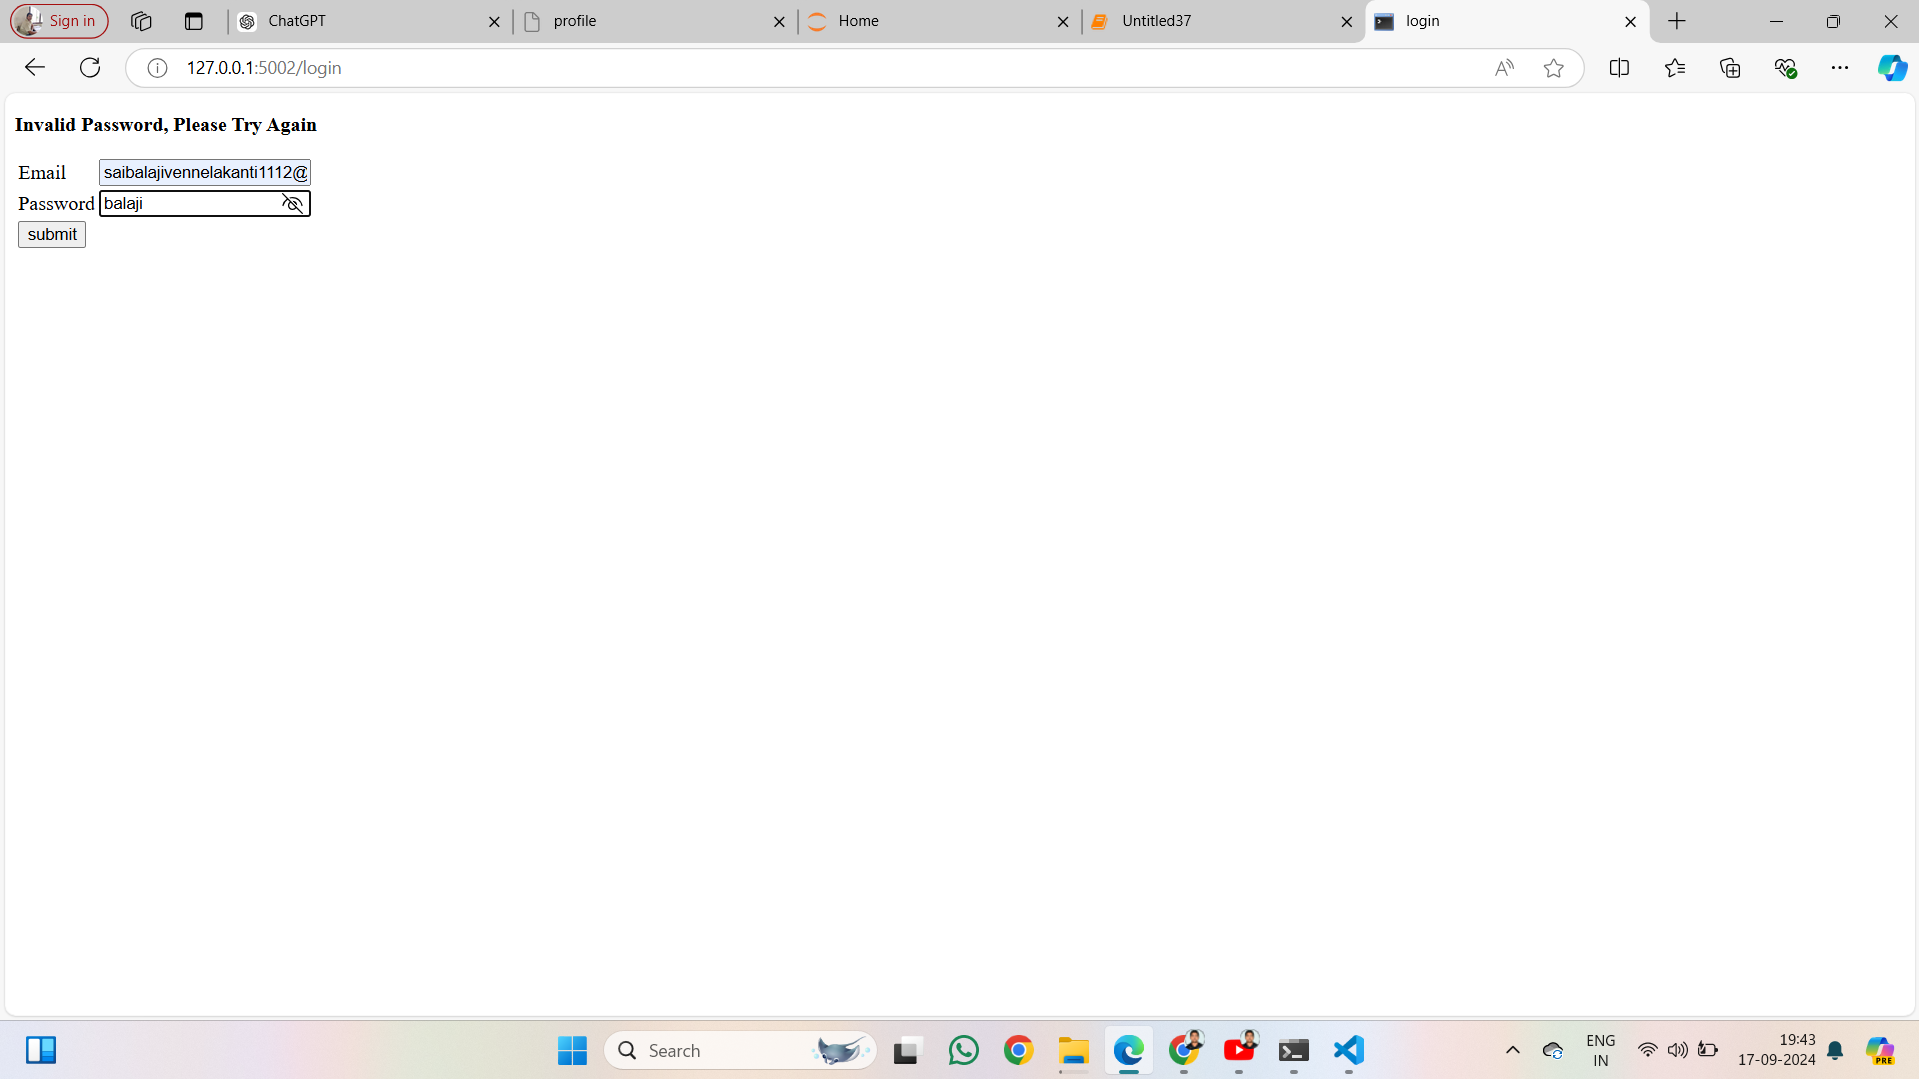

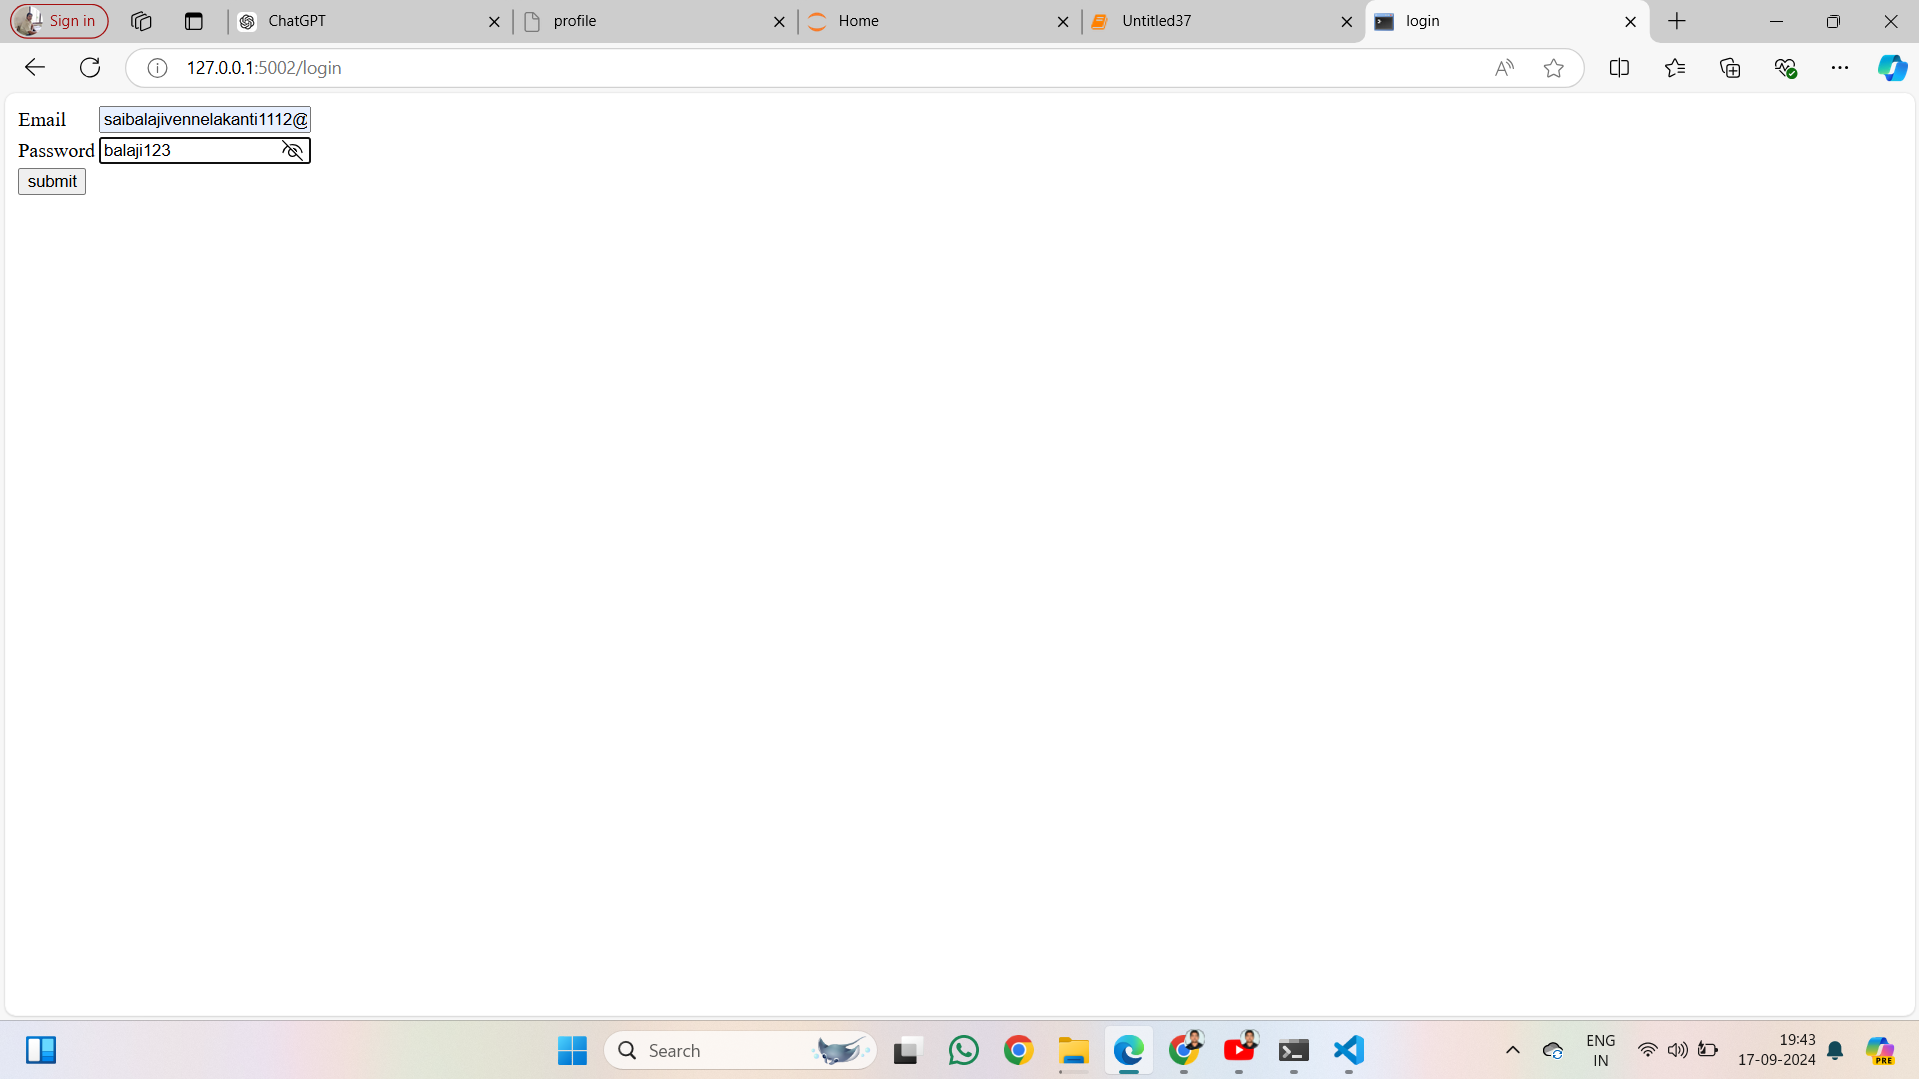

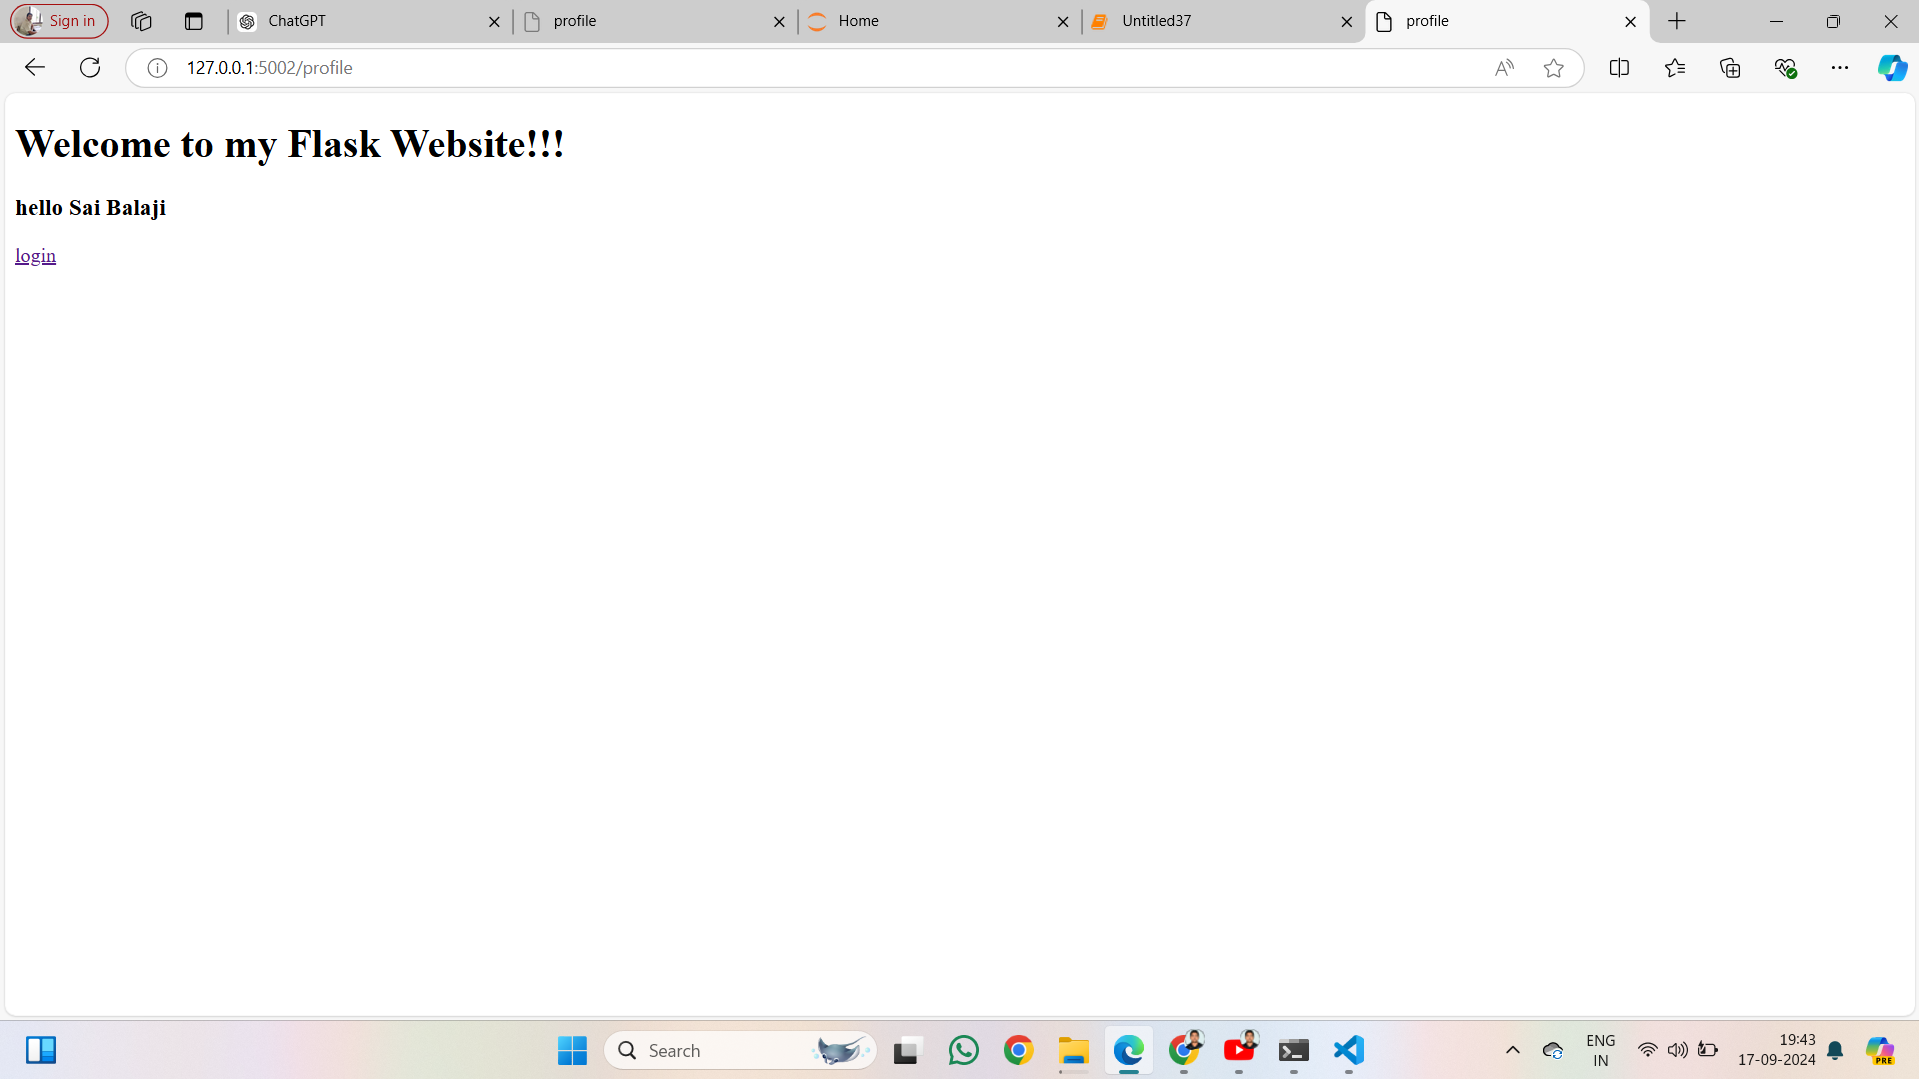

In [7]:
from IPython.display import Image,display
a=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-09-17 194304.png"
b=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-09-17 194354.png"
c=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-09-17 194325.png"
d=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-09-17 194402.png"
display(Image(filename=a))
display(Image(filename=b))
display(Image(filename=c))
display(Image(filename=d))

In [ ]:
Flask-Mail Extension

Considering the fact that flask is a micro framework, it has its limitations in providing the facilities to the developer. 
Although, there are several extensions to the flask like Mail, WTF, SQLite, SQLAlchemy, etc. which facilitates the developer to provide 
some basic facilities to the user.

In this section of the tutorial, we will study one of the most common extensions to the flask, i.e., Flask-Mail.

A web application must be capable of sending emails to users. The flask-mail extension provides the simple interface 
for the developer and the email server to send the email through the web application.

For this purpose, we must install the flask-mail extension using the pip installer.

pip install Flask-Mail
The application must configure the flask-mail for the following parameters.

__________________________________________________________________________________________________________________________
|SN |       Parameter |           Description                                                                            |
|___|_________________|__________________________________________________________________________________________________|
| 1 |   MAIL_SERVER   | It represents the name or IP address of the email server. The default is localhost.              |
|___|_________________|__________________________________________________________________________________________________|
| 2 |  MAIL_PORT      |   It represents the port number of the server. Default port number is 25.                        |
|___|_________________|__________________________________________________________________________________________________|
| 3 |  MAIL_USE_TLS   | It is used to enable or disable the transport security layer description. The default is false.  |
|___|_________________|__________________________________________________________________________________________________|
| 4 | MAIL_USE_SSL    | It is used to enable or disable the secure socket layer description. The default value is false. |
|___|_________________|__________________________________________________________________________________________________|
| 5 | MAIL_DEBUG      | It is used to provide the debug support to the mail application. The default value is None.      |
|___|_________________|__________________________________________________________________________________________________|
| 6 | MAIL_USERNAME   | It represents the user name of the sender. The default value is None.                            |
|___|_________________|__________________________________________________________________________________________________|
| 7 | MAIL_PASSWORD   |It represents the password of the server email id. The default value is None.                     |
|___|_________________|__________________________________________________________________________________________________|
| 8 |MAIL_DEFAULT_SENDER|It is used to set the default sender id for the multiple emails. The default value is None.     |
|___|_________________|__________________________________________________________________________________________________|
| 9 | MAIL_MAX_EMAILS | It is used to set the maximum number of email to be sent. The default value is None.             |
|___|_________________|__________________________________________________________________________________________________|
|10 |MAIL_SUPPRESS_SEND| Sending the mail is suppressed if the app.testing is set to the true.                           |
|___|_________________|__________________________________________________________________________________________________|
|11 |MAIL_ASCII_ATTACHMENTS|If it is set to true, attached file names are converted to ASCII. The default is False.      |
|___|_________________|__________________________________________________________________________________________________|

Flask-Mail Module Classes
There are several classes which are important to send emails using the python flask web application.

Message class
The Message class binds the email message into the one simple Message class instance so that the important methods like attach() 
can be called on this instance. The syntax to instantiate the Message class is given below.

Flask-mail.Message(subject, recipients, body, html, sender, cc, bcc, reply-to, date, charset, extra-headers, mail-options, rcpt_options)  
There are the following methods that can be called on the Message class object.

attach(filename, content_type, data, disposition): this method is used to send the attachments with the message. 
This method accepts the name of the file, MIME type of file, raw file data, and the content disposition.
add_recipient(): It is used to add the recipient to the message.
Mail Class
Mail class object is used to send the email. The Mail class is instantiated by passing the application object to the Mail 
class constructor as given below.

Flask-mail.Mail(app=None)   
The Mail class contains the following methods.

send(): It sends the message object content to the recipient.
connect(): It is used to open the connection with mail host.
send_message(): It is used to send the message object.

In [ ]:
from flask import *
from flask_mail import *
app=Flask(__name__)
app.config['MAIL_SERVER']='abc@gmail.com'
app.config['MAIL_PORT']=500
app.config['MAIL_USERNAME']='admin@gmail.com'
app.config['Mail_PASSWORD']='abc123'
app.config['MAIL_USE_TLS']=False
app.config['MAIL_USE_SSL']=True
mail=Mail(app)
@app.route('/')
def index():
    message=Message('subject',sender='admin@gmail.com',recipients=['username@gmail.com'])
    message.body='Hello, This is the mail was sent by using the flask web application'
    return 'mail was sent, check in your mail Id'
if __name__=='__main__':
    app.run(port=5003)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5003
Press CTRL+C to quit
127.0.0.1 - - [17/Sep/2024 20:25:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2024 20:26:00] "GET /favicon.ico HTTP/1.1" 404 -


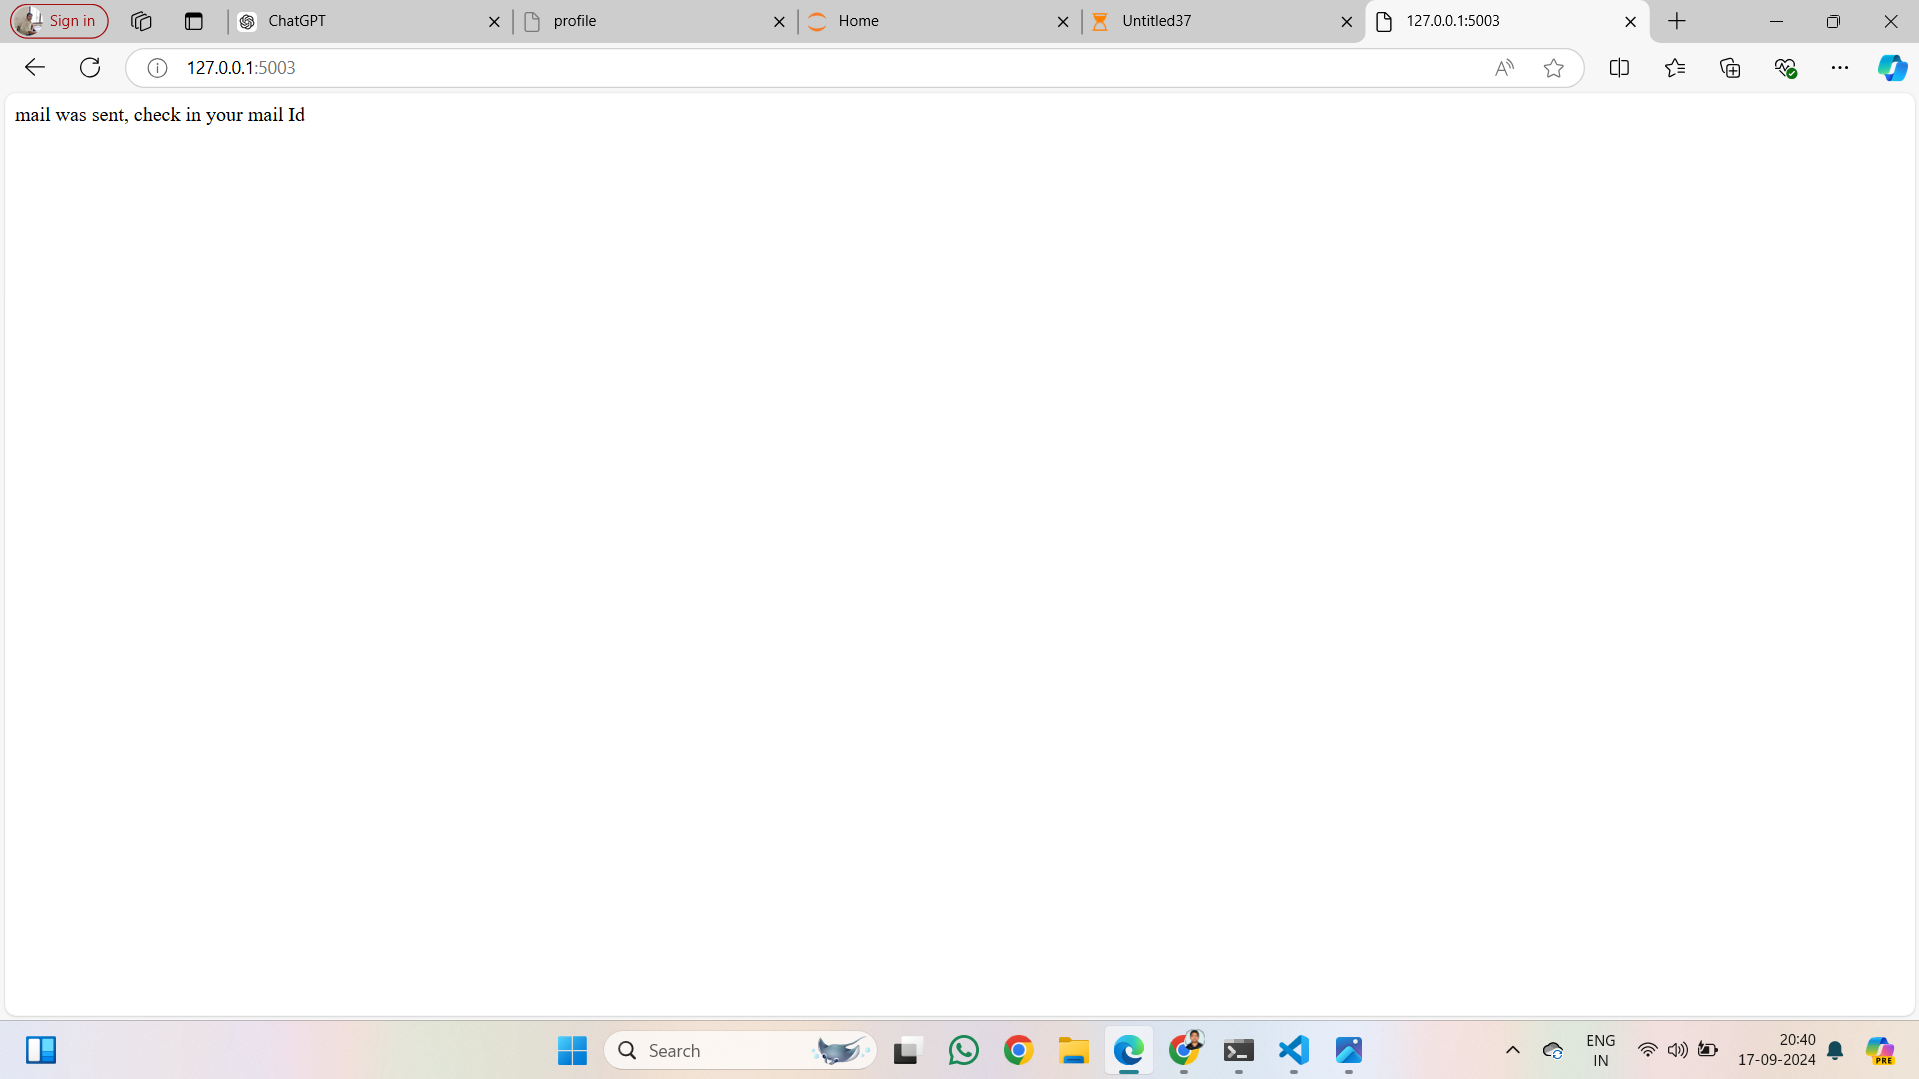

In [11]:
from IPython.display import Image, display
a=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-09-17 204057.png"
display(Image(filename=a))

In [ ]:
from flask import *
from flask_mail import Mail, Message
from random import randint
app = Flask(__name__)
app.config['MAIL_SERVER'] = 'smtp.gmail.com'
app.config['MAIL_PORT'] = 465
app.config['MAIL_USERNAME'] = 'admin@gmail.com'  
app.config['MAIL_PASSWORD'] = 'balaji'  
app.config['MAIL_USE_TLS'] = False
app.config['MAIL_USE_SSL'] = True
mail = Mail(app)
@app.route('/')
def signin():
    return render_template('signin.html')
@app.route('/verify', methods=['POST'])
def verify():
    email = request.form['email']
    otp = randint(100000, 999999)  
    session['otp'] = otp  
    session['email'] = email
    message = Message('OTP Verification', sender='your_email@gmail.com', recipients=[email])
    message.body = f"Your OTP is: {otp}"
    mail.send(message)
    return render_template('verify.html')
@app.route('/validate', methods=["POST"])
def validate():
    user_otp = request.form['otp'] 
    if 'otp' in session and int(user_otp) == session['otp']:
        return "<h3>Email verified successfully</h3>"
    return "<h3>Failure: OTP did not match</h3>"
if __name__ == '__main__':
    app.run(port=5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
[2024-09-17 20:58:14,401] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_22820\2107042652.py", line 14, in signin
    return render_template('sign